# Análise e Transformação dos Dados da Tabela Principal


In [95]:
#Utilizando a biblioteca pandas para ler o arquivo .csv e armazenar em um Data Frame

import pandas as pd

url_dados = "C:/Users/julia/Documents/DrMonitora - Valesca/arq_casco_comp.csv"
base = pd.read_csv(url_dados,  sep = ';')

In [96]:
#Visualizando o Data Frame 

base

,COD_TARIF,REGIAO,COD_MODELO,ANO_MODELO,SEXO,IDADE,EXPOSICAO1,PREMIO1,EXPOSICAO2,PREMIO2,...,INDENIZ1,FREQ_SIN2,INDENIZ2,FREQ_SIN3,INDENIZ3,FREQ_SIN4,INDENIZ4,FREQ_SIN9,INDENIZ9,ENVIO
0,1,27,004319-2,2009,M,1,"1,03013694286346","826,299728393555",0,0,...,15230,0,0,0,0,0,0,0,0,2020A
1,1,31,015161-0,2019,M,4,"3,47945190966129","4762,3455657959",0,0,...,0,0,0,0,0,0,0,1,425,2020A
2,5,12,817062-2,2014,M,1,"1,67945200949907","1786,30611419678",0,0,...,29327,0,0,0,0,0,0,0,0,2020A
3,3,09,014054-6,2011,M,5,"15,5890406630933","21008,6883153915",0,0,...,0,2,27672,0,0,0,0,2,166,2020A
4,1,39,005365-1,2015,J,4,"1,34520542621613","1438,61456298828",0,0,...,0,0,0,0,0,0,0,0,0,2020A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210976,1,13,005484-4,2018,0,0,"1,51232868432999","2290,37023925781",0,0,...,0,1,2113,0,0,0,0,1,948,2020A
3210977,3,11,506134-2,2017,F,4,"1,01369861513376","2068,83509063721",0,0,...,0,0,0,0,0,0,0,0,0,2020A
3210978,1,18,005251-5,2010,M,2,"3,97260258952156","7240,98525619507",0,0,...,0,0,0,0,0,0,0,1,105,2020A
3210979,3,13,003048-1,1995,M,5,"6,94520519673824","6937,94590091705",0,0,...,0,0,0,0,0,0,0,0,0,2020A


In [97]:
#Visualizando o tipo de cada coluna

base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3210981 entries, 0 to 3210980
Data columns (total 22 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   COD_TARIF   int64 
 1   REGIAO      object
 2   COD_MODELO  object
 3   ANO_MODELO  int64 
 4   SEXO        object
 5   IDADE       int64 
 6   EXPOSICAO1  object
 7   PREMIO1     object
 8   EXPOSICAO2  int64 
 9   PREMIO2     int64 
 10  IS_MEDIA    object
 11  FREQ_SIN1   int64 
 12  INDENIZ1    int64 
 13  FREQ_SIN2   int64 
 14  INDENIZ2    int64 
 15  FREQ_SIN3   int64 
 16  INDENIZ3    int64 
 17  FREQ_SIN4   int64 
 18  INDENIZ4    int64 
 19  FREQ_SIN9   int64 
 20  INDENIZ9    int64 
 21  ENVIO       object
dtypes: int64(15), object(7)
memory usage: 539.0+ MB


In [98]:
#Visualizando a quantidade de Valores distintos de cada coluna

base.nunique().sort_values()

ENVIO               1
PREMIO2             1
EXPOSICAO2          1
SEXO                4
FREQ_SIN4           5
IDADE               6
COD_TARIF           8
FREQ_SIN3          11
FREQ_SIN1          41
REGIAO             44
ANO_MODELO         74
FREQ_SIN2         102
FREQ_SIN9         238
INDENIZ4         2126
COD_MODELO       8186
INDENIZ9        24679
INDENIZ1        31376
INDENIZ3        36376
INDENIZ2        43533
EXPOSICAO1     434610
PREMIO1       2370287
IS_MEDIA      2557350
dtype: int64

In [99]:
#Visualizando os valores unicos para a coluna SEXO

base['SEXO'].unique()

array(['M', 'J', 'F', '0'], dtype=object)

No Dicionário de Dados é informado que M = Marculino, J = Pessoa Jurídica, F = Feminino e 0  = Sem informação.
Para esta análise, optei por trabalhar somente com os dados Masculino e Feminino. Para isto, irei selecionar os dados que se enquadram e salvar em um novo Data Frame.

In [100]:
#Utilizando a função query do pandas para filtrar os dados da coluna SEXO que forem iguais a M ou F

base_filtro1 = base.query('SEXO == "M" | SEXO == "F"')
base_filtro1

,COD_TARIF,REGIAO,COD_MODELO,ANO_MODELO,SEXO,IDADE,EXPOSICAO1,PREMIO1,EXPOSICAO2,PREMIO2,...,INDENIZ1,FREQ_SIN2,INDENIZ2,FREQ_SIN3,INDENIZ3,FREQ_SIN4,INDENIZ4,FREQ_SIN9,INDENIZ9,ENVIO
0,1,27,004319-2,2009,M,1,"1,03013694286346","826,299728393555",0,0,...,15230,0,0,0,0,0,0,0,0,2020A
1,1,31,015161-0,2019,M,4,"3,47945190966129","4762,3455657959",0,0,...,0,0,0,0,0,0,0,1,425,2020A
2,5,12,817062-2,2014,M,1,"1,67945200949907","1786,30611419678",0,0,...,29327,0,0,0,0,0,0,0,0,2020A
3,3,09,014054-6,2011,M,5,"15,5890406630933","21008,6883153915",0,0,...,0,2,27672,0,0,0,0,2,166,2020A
6,3,23,001352-8,2014,F,3,"0,490410953760147","671,983581542969",0,0,...,0,0,0,0,0,0,0,0,0,2020A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210972,5,19,817052-5,2012,M,3,"0,506849318742752","274,881523132324",0,0,...,0,0,0,0,0,0,0,0,0,2020A
3210977,3,11,506134-2,2017,F,4,"1,01369861513376","2068,83509063721",0,0,...,0,0,0,0,0,0,0,0,0,2020A
3210978,1,18,005251-5,2010,M,2,"3,97260258952156","7240,98525619507",0,0,...,0,0,0,0,0,0,0,1,105,2020A
3210979,3,13,003048-1,1995,M,5,"6,94520519673824","6937,94590091705",0,0,...,0,0,0,0,0,0,0,0,0,2020A


In [101]:
#Verificando os valores unicos para sexo

base_filtro1['SEXO'].unique()

array(['M', 'F'], dtype=object)

In [102]:
#Visualizando os valores unicos para a coluna IDADE

base_filtro1['IDADE'].unique()

array([1, 4, 5, 3, 2, 0], dtype=int64)

No Dicionário de Dados é informado que 0 = Não informada, 1 = Entre 18 e 25 anos, 2 = Entre 26 e 35 anos, 3 = Entre 36 e 45 anos, 4 = Entre 46 e 55 anos e 5 = Maior que 55 anos. Para esta análise, optei por trabalhar somente com as faixa etárias informadas e excluir os dados não informados. Para isto, irei selecionar os dados que se enquadram e salvar em um novo Data Frame.

In [103]:
#Utilizando a função query do pandas para filtrar os dados da coluna IDADE que for diferente de 0
base_filtro2 = base_filtro1.query('IDADE != 0')
base_filtro2

,COD_TARIF,REGIAO,COD_MODELO,ANO_MODELO,SEXO,IDADE,EXPOSICAO1,PREMIO1,EXPOSICAO2,PREMIO2,...,INDENIZ1,FREQ_SIN2,INDENIZ2,FREQ_SIN3,INDENIZ3,FREQ_SIN4,INDENIZ4,FREQ_SIN9,INDENIZ9,ENVIO
0,1,27,004319-2,2009,M,1,"1,03013694286346","826,299728393555",0,0,...,15230,0,0,0,0,0,0,0,0,2020A
1,1,31,015161-0,2019,M,4,"3,47945190966129","4762,3455657959",0,0,...,0,0,0,0,0,0,0,1,425,2020A
2,5,12,817062-2,2014,M,1,"1,67945200949907","1786,30611419678",0,0,...,29327,0,0,0,0,0,0,0,0,2020A
3,3,09,014054-6,2011,M,5,"15,5890406630933","21008,6883153915",0,0,...,0,2,27672,0,0,0,0,2,166,2020A
6,3,23,001352-8,2014,F,3,"0,490410953760147","671,983581542969",0,0,...,0,0,0,0,0,0,0,0,0,2020A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210972,5,19,817052-5,2012,M,3,"0,506849318742752","274,881523132324",0,0,...,0,0,0,0,0,0,0,0,0,2020A
3210977,3,11,506134-2,2017,F,4,"1,01369861513376","2068,83509063721",0,0,...,0,0,0,0,0,0,0,0,0,2020A
3210978,1,18,005251-5,2010,M,2,"3,97260258952156","7240,98525619507",0,0,...,0,0,0,0,0,0,0,1,105,2020A
3210979,3,13,003048-1,1995,M,5,"6,94520519673824","6937,94590091705",0,0,...,0,0,0,0,0,0,0,0,0,2020A


In [104]:
base_filtro2['IDADE'].unique()

array([1, 4, 5, 3, 2], dtype=int64)

In [105]:
#Verificando os valores unicos para a coluna REGIAO

base_filtro2['REGIAO'].unique()

array(['27', '31', '12', '09', '23', '07', '05', '39', '10', '11', '38',
       '16', '36', '02', '14', '08', '21', '15', '13', '26', '01', '03',
       '41', '29', '19', '40', '25', '30', '00', '99', '06', '04', '20',
       '18', '28', '37', ' .', '22', '34', '24', '17', '32', '33', '35'],
      dtype=object)

Acima identificamos que a coluna REGIAO possui o valor " ." (espaço seguido de ponto) que não está informado no dicionário de dados. Então irei criar um novo Data Frame sem essa informação.

In [106]:
#Utilizando a função query do pandas para filtrar os dados da coluna REGIAO que são diferentes de " ."

base_filtro3 = base_filtro2.query('REGIAO != " ."')
base_filtro3

,COD_TARIF,REGIAO,COD_MODELO,ANO_MODELO,SEXO,IDADE,EXPOSICAO1,PREMIO1,EXPOSICAO2,PREMIO2,...,INDENIZ1,FREQ_SIN2,INDENIZ2,FREQ_SIN3,INDENIZ3,FREQ_SIN4,INDENIZ4,FREQ_SIN9,INDENIZ9,ENVIO
0,1,27,004319-2,2009,M,1,"1,03013694286346","826,299728393555",0,0,...,15230,0,0,0,0,0,0,0,0,2020A
1,1,31,015161-0,2019,M,4,"3,47945190966129","4762,3455657959",0,0,...,0,0,0,0,0,0,0,1,425,2020A
2,5,12,817062-2,2014,M,1,"1,67945200949907","1786,30611419678",0,0,...,29327,0,0,0,0,0,0,0,0,2020A
3,3,09,014054-6,2011,M,5,"15,5890406630933","21008,6883153915",0,0,...,0,2,27672,0,0,0,0,2,166,2020A
6,3,23,001352-8,2014,F,3,"0,490410953760147","671,983581542969",0,0,...,0,0,0,0,0,0,0,0,0,2020A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210972,5,19,817052-5,2012,M,3,"0,506849318742752","274,881523132324",0,0,...,0,0,0,0,0,0,0,0,0,2020A
3210977,3,11,506134-2,2017,F,4,"1,01369861513376","2068,83509063721",0,0,...,0,0,0,0,0,0,0,0,0,2020A
3210978,1,18,005251-5,2010,M,2,"3,97260258952156","7240,98525619507",0,0,...,0,0,0,0,0,0,0,1,105,2020A
3210979,3,13,003048-1,1995,M,5,"6,94520519673824","6937,94590091705",0,0,...,0,0,0,0,0,0,0,0,0,2020A


In [107]:
#Verificando os valores unicos da coluna REGIAO

base_filtro3['REGIAO'].unique()

array(['27', '31', '12', '09', '23', '07', '05', '39', '10', '11', '38',
       '16', '36', '02', '14', '08', '21', '15', '13', '26', '01', '03',
       '41', '29', '19', '40', '25', '30', '00', '99', '06', '04', '20',
       '18', '28', '37', '22', '34', '24', '17', '32', '33', '35'],
      dtype=object)

No Dicionário de Dados é informado que as colunas EXPOSICAO2 e PREMIO2 não são utilizadas, então iri excluí-las juntamente com a coluna COD_MODELO.

In [108]:
#Utilizando a função drop para excluir as colunas e depois visualizando o Data Frame

base_final = base_filtro3.drop(['EXPOSICAO2','PREMIO2', 'COD_MODELO'], axis = 1)
base_final

,COD_TARIF,REGIAO,ANO_MODELO,SEXO,IDADE,EXPOSICAO1,PREMIO1,IS_MEDIA,FREQ_SIN1,INDENIZ1,FREQ_SIN2,INDENIZ2,FREQ_SIN3,INDENIZ3,FREQ_SIN4,INDENIZ4,FREQ_SIN9,INDENIZ9,ENVIO
0,1,27,2009,M,1,"1,03013694286346","826,299728393555","9689,39340420521",1,15230,0,0,0,0,0,0,0,0,2020A
1,1,31,2019,M,4,"3,47945190966129","4762,3455657959","47179,5493677369",0,0,0,0,0,0,0,0,1,425,2020A
2,5,12,2014,M,1,"1,67945200949907","1786,30611419678","29745,5496566595",1,29327,0,0,0,0,0,0,0,0,2020A
3,3,09,2011,M,5,"15,5890406630933","21008,6883153915","43139,5276392829",0,0,2,27672,0,0,0,0,2,166,2020A
6,3,23,2014,F,3,"0,490410953760147","671,983581542969","44873,0004270315",0,0,0,0,0,0,0,0,0,0,2020A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210972,5,19,2012,M,3,"0,506849318742752","274,881523132324","20448,3729448291",0,0,0,0,0,0,0,0,0,0,2020A
3210977,3,11,2017,F,4,"1,01369861513376","2068,83509063721","109555,545916502",0,0,0,0,0,0,0,0,0,0,2020A
3210978,1,18,2010,M,2,"3,97260258952156","7240,98525619507","25368,1394015071",0,0,0,0,0,0,0,0,1,105,2020A
3210979,3,13,1995,M,5,"6,94520519673824","6937,94590091705","24641,3811422925",0,0,0,0,0,0,0,0,0,0,2020A


In [109]:
#Importando as bibliotecas gráficas Seaborn e Matplotlib 

import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='IDADE'>

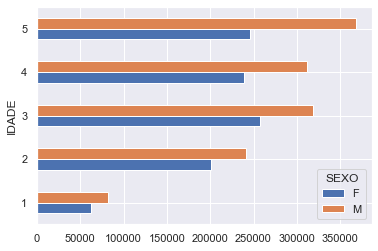

In [110]:
#Visualizando a relação entre idade e sexo, agrupada pela idade

base_final.groupby(by = ['IDADE'])['SEXO'].value_counts().unstack().plot.barh()

Acima vemos que para todas as faixas etárias, existem mais homens que mulheres.

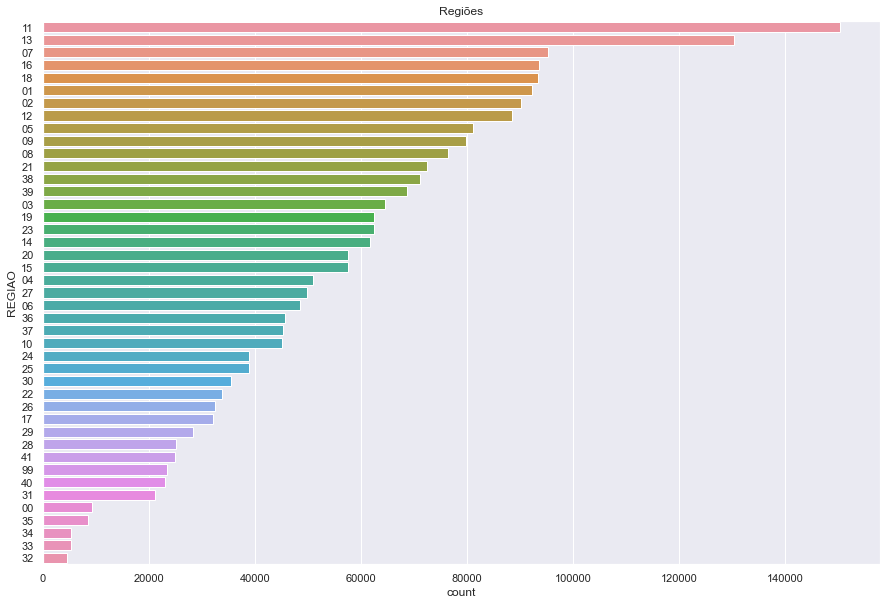

In [111]:
#Visualizando a distribuição de REGIAO

sns.set()
plt.figure(figsize=(15, 10))
ax = sns.countplot(y = 'REGIAO', data = base_final, order = base_final['REGIAO'].value_counts().index)
ax.set_title('Regiões')
plt.show()

Acima vemos que as regiões com mais ocorrencias são 11, 13 e 07 (Região Metropolitana de São Paulo, Ribeirão Preto e Demais Municipíos de Campinas e Região Metropolitana de Curitiba, respectivamente).

<AxesSubplot:ylabel='COD_TARIF'>

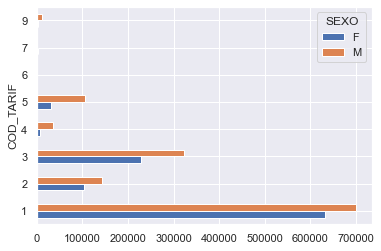

In [112]:
#Visualizandoa relação entre o COD_TARIF e SEXO

base_final.groupby(by = ['COD_TARIF'])['SEXO'].value_counts().unstack().plot.barh()

COD_TARIF representa os códigos das categorias tarifárias, que são:

1 = Passeio nacional

2 = Passeio importado

3 = Pick-up (nacional e importado)

4 = Veículo de Carga (nacional e importado)

5 = Motocicleta (nacional e importado)

6 = Ônibus (nacional e importado)

7 = Utilitários (nacional e importado)

9 = Outros

Acima vemos que as tarifas que mais possuem ocorrencias é Passeio Nacional e Pick-up (Nacional e Importado), sendo mais registros Masculinos que Femininos

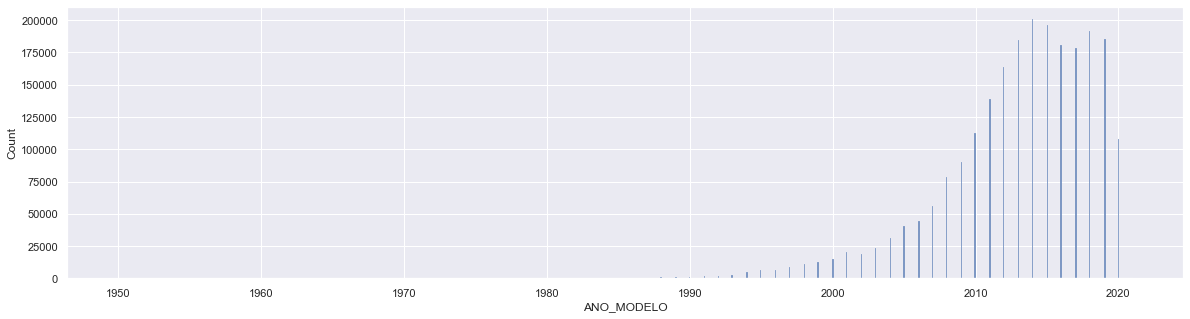

In [113]:
#Visualizando a distribuição de ANO_MODELO

sns.set()
plt.figure(figsize=(20,5))
ax = sns.histplot(x = 'ANO_MODELO', data = base_final)
plt.show()

A partir deste histograma entendemos que a maioria do veículos registrados estão entre 2010 e 2020, e basicamente não existem registros de veículos com ano abaixo de 1990.

In [114]:
#Verificando o tipo das colunas do Data Frame final

base_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324526 entries, 0 to 3210980
Data columns (total 19 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   COD_TARIF   int64 
 1   REGIAO      object
 2   ANO_MODELO  int64 
 3   SEXO        object
 4   IDADE       int64 
 5   EXPOSICAO1  object
 6   PREMIO1     object
 7   IS_MEDIA    object
 8   FREQ_SIN1   int64 
 9   INDENIZ1    int64 
 10  FREQ_SIN2   int64 
 11  INDENIZ2    int64 
 12  FREQ_SIN3   int64 
 13  INDENIZ3    int64 
 14  FREQ_SIN4   int64 
 15  INDENIZ4    int64 
 16  FREQ_SIN9   int64 
 17  INDENIZ9    int64 
 18  ENVIO       object
dtypes: int64(13), object(6)
memory usage: 354.7+ MB


As coluna EXPOSICAO1, PREMIO1 e IS_MEDIA são do tipo object, precisamos mudar para o tipo numeric. Para isso, primeiramente irei substituir a virgula (",") por ponto (".")

In [115]:
#Substituindo a virgula por ponto e visualizando o Data Frame final

base_final['EXPOSICAO1'] =  base_final['EXPOSICAO1'].str.replace(',','.')
base_final['PREMIO1'] =  base_final['PREMIO1'].str.replace(',','.')
base_final['IS_MEDIA'] = base_final['IS_MEDIA'].str.replace(',','.')

base_final

,COD_TARIF,REGIAO,ANO_MODELO,SEXO,IDADE,EXPOSICAO1,PREMIO1,IS_MEDIA,FREQ_SIN1,INDENIZ1,FREQ_SIN2,INDENIZ2,FREQ_SIN3,INDENIZ3,FREQ_SIN4,INDENIZ4,FREQ_SIN9,INDENIZ9,ENVIO
0,1,27,2009,M,1,1.03013694286346,826.299728393555,9689.39340420521,1,15230,0,0,0,0,0,0,0,0,2020A
1,1,31,2019,M,4,3.47945190966129,4762.3455657959,47179.5493677369,0,0,0,0,0,0,0,0,1,425,2020A
2,5,12,2014,M,1,1.67945200949907,1786.30611419678,29745.5496566595,1,29327,0,0,0,0,0,0,0,0,2020A
3,3,09,2011,M,5,15.5890406630933,21008.6883153915,43139.5276392829,0,0,2,27672,0,0,0,0,2,166,2020A
6,3,23,2014,F,3,0.490410953760147,671.983581542969,44873.0004270315,0,0,0,0,0,0,0,0,0,0,2020A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210972,5,19,2012,M,3,0.506849318742752,274.881523132324,20448.3729448291,0,0,0,0,0,0,0,0,0,0,2020A
3210977,3,11,2017,F,4,1.01369861513376,2068.83509063721,109555.545916502,0,0,0,0,0,0,0,0,0,0,2020A
3210978,1,18,2010,M,2,3.97260258952156,7240.98525619507,25368.1394015071,0,0,0,0,0,0,0,0,1,105,2020A
3210979,3,13,1995,M,5,6.94520519673824,6937.94590091705,24641.3811422925,0,0,0,0,0,0,0,0,0,0,2020A


In [116]:
#Transformando as colunas para o tipo numeric e visualizando as informações de tipo de coluna 

base_final['EXPOSICAO1'] =  pd.to_numeric(base_final['EXPOSICAO1'])
base_final['PREMIO1'] =  pd.to_numeric(base_final['PREMIO1'])
base_final['IS_MEDIA'] = pd.to_numeric(base_final['IS_MEDIA'])

base_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324526 entries, 0 to 3210980
Data columns (total 19 columns):
 #   Column      Dtype  
---  ------      -----  
 0   COD_TARIF   int64  
 1   REGIAO      object 
 2   ANO_MODELO  int64  
 3   SEXO        object 
 4   IDADE       int64  
 5   EXPOSICAO1  float64
 6   PREMIO1     float64
 7   IS_MEDIA    float64
 8   FREQ_SIN1   int64  
 9   INDENIZ1    int64  
 10  FREQ_SIN2   int64  
 11  INDENIZ2    int64  
 12  FREQ_SIN3   int64  
 13  INDENIZ3    int64  
 14  FREQ_SIN4   int64  
 15  INDENIZ4    int64  
 16  FREQ_SIN9   int64  
 17  INDENIZ9    int64  
 18  ENVIO       object 
dtypes: float64(3), int64(13), object(3)
memory usage: 354.7+ MB


Agora que todas as transformações foram feitas, irei salvar o Data Frame Final em um arquivo .csv

In [117]:
base_final.to_csv('final.csv', index=False)